In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('yelp_user.csv')

## Max number of Friends

In [3]:
fr = df[df['friends'] != 'None'][['friends']]

In [4]:
fr['nr_of_friends'] = fr['friends'].map(lambda x: len(x.split(',')))

In [5]:
fr['nr_of_friends'].max()

14995

## Create Network

In [6]:
df.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0


In [7]:
df.shape

(1326100, 22)

In [8]:
df_connections = pd.concat([pd.Series(row['user_id'], row['friends'].split(',')) for _, row in df.iloc[300000:500000].iterrows()]).reset_index()

In [9]:
df_connections.columns = ['user_id', 'friends']

In [10]:
df_connections.head()

,user_id,friends
0,a1K5-QgS7cL8DaNkaBaWjw,C2b3O2uJ1j-xvLhZTqpslA
1,iABXnk_EBVJmvwMAn9T3QA,C2b3O2uJ1j-xvLhZTqpslA
2,8xFjofx6Xo5OdZKcPhvDBA,C2b3O2uJ1j-xvLhZTqpslA
3,7b1Q94_vAlhoxalOB16bOg,C2b3O2uJ1j-xvLhZTqpslA
4,YKs8PJPZ15xzJU-6J7ua4A,C2b3O2uJ1j-xvLhZTqpslA


In [11]:
G = nx.from_pandas_edgelist(df_connections, 'user_id', 'friends')

In [12]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 3888648
Number of edges: 7455910
Average degree:   3.8347


In [13]:
ego = nx.ego_graph(G, df_connections['friends'][0])

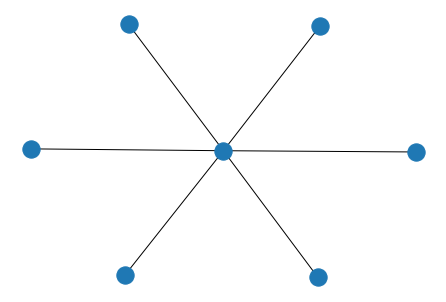

In [14]:
nx.draw(ego, with_labels=False)
plt.show()